In [37]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/04%20-%20Data%20Preprocessing/data_assignment.csv',sep=',')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


1. Null values - replace
2. Duplicated
2. Text error
3. Outlier
4. Negative value
5. Scaling
6. Encoding

In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data['Item_Weight'].mean()

12.857645184135976

In [11]:
data['Item_Weight'].median()

12.6

<Axes: >

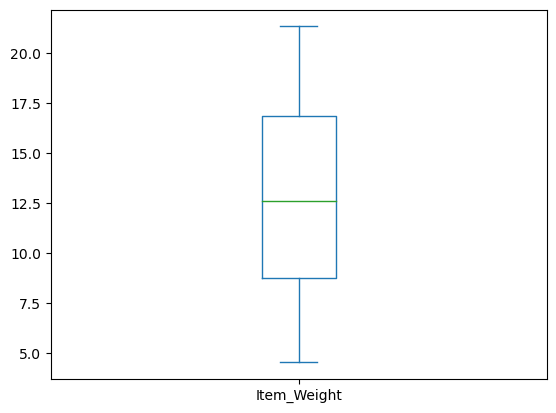

In [12]:
data['Item_Weight'].plot(kind='box')

In [13]:
data['Item_Weight']= data['Item_Weight'].fillna(data['Item_Weight'].median())

In [14]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
data1=data

In [16]:
#Detecting outlier with z-score
outliers=[]
def detect_outlier(insurance):
    
    threshold=3
    mean_1 = np.mean(insurance)
    std_1 = np.std(insurance)
    
    
    for y in insurance:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [17]:
data['Item_Weight'] = data['Item_Weight'].astype('float')

In [18]:
data.select_dtypes(include=np.number).apply(detect_outlier)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.255395,0.255395,0.255395,0.255395,0.255395
1,0.293418,0.293418,0.293418,0.293418,0.293418
2,0.278974,0.278974,0.278974,0.278974,0.278974
3,0.291865,0.291865,0.291865,0.291865,0.291865
4,0.264125,0.264125,0.264125,0.264125,0.264125
...,...,...,...,...,...
180,9227.988000,9227.988000,9227.988000,9227.988000,9227.988000
181,8994.958000,8994.958000,8994.958000,8994.958000,8994.958000
182,9390.443200,9390.443200,9390.443200,9390.443200,9390.443200
183,7549.506200,7549.506200,7549.506200,7549.506200,7549.506200


In [19]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)


In [23]:
#removing Item_Visibility outlier
data=data[data['Item_Visibility']>0.2]

In [24]:
data['Item_Visibility'].mean()

0.24829077997761195

In [25]:
data['Item_Visibility'].median()

0.2395500615

<Axes: >

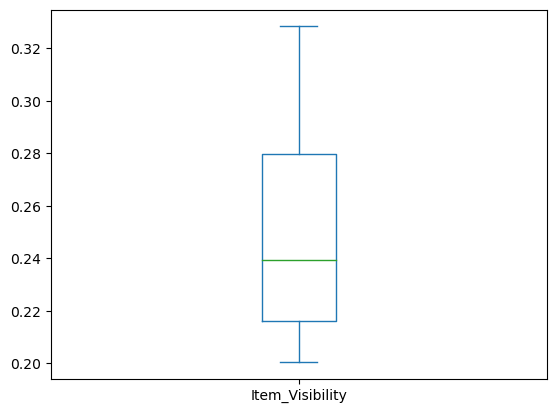

In [26]:
data['Item_Visibility'].plot(kind='box')

In [27]:
data.isna().sum()

Item_Identifier               0
Item_Weight                   0
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                  62
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
dtype: int64

In [29]:
data['Outlet_Size'].unique()

array(['Small', nan], dtype=object)

In [30]:
data['Outlet_Size'].isna().sum()

62

In [31]:
data['Outlet_Size'].unique()

array(['Small', nan], dtype=object)

In [32]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

C:\Users\yamin\AppData\Local\Temp\ipykernel_14932\201994062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)


In [33]:
data['Outlet_Size'].isna().sum()

0

In [34]:
data['Outlet_Size'].unique()

array(['Small'], dtype=object)

In [35]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [36]:
data.shape

(134, 12)

In [38]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Item_Weight
Outliers =  174     17.700
521     18.100
532      8.710
680     15.500
966      4.610
1272    16.600
1291     4.880
1311    16.100
1496     7.680
1644     6.035
1651    18.200
1754     9.195
2088     9.800
2324     5.325
2336     7.605
2728     5.365
2855     7.670
3001     6.300
3171     6.715
3336     7.435
3399    15.850
3488     9.300
4219     7.630
4350    17.250
4530    16.850
4656    16.850
4941    20.350
5031    17.350
5050    19.000
5083     8.390
5154    14.500
5374    18.600
5734     9.395
5837     7.825
5891    17.700
6012     7.600
6536    18.000
6576    19.100
6670     6.465
6674     9.100
6833    17.000
6966    15.700
7107     9.500
7388     7.155
7639     5.615
8371     8.270
8509     8.100
Name: Item_Weight, dtype: float64
Item_Visibility
Outliers =  Series([], Name: Item_Visibility, dtype: float64)
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)

<Axes: >

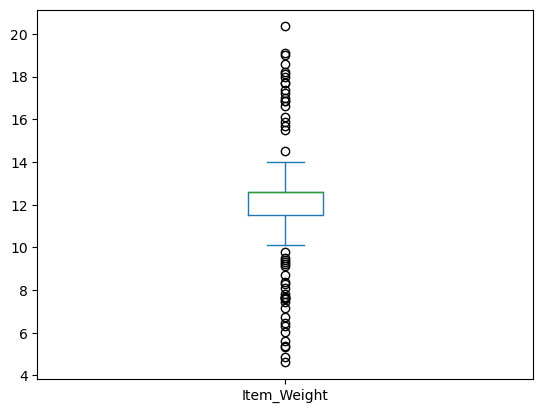

In [39]:
data['Item_Weight'].plot(kind='box')

In [42]:
data2=data1

In [43]:
data1 = data1[(data1['Item_Weight']>15)]

<Axes: >

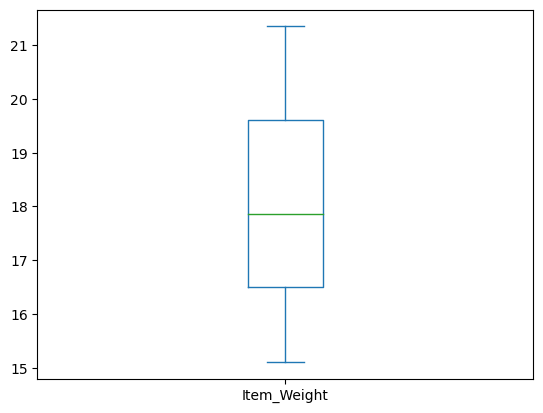

In [45]:
data1['Item_Weight'].plot(kind='box')

In [47]:
data=data1

In [50]:
data = data[(data['Item_Weight']>15)]

<Axes: >

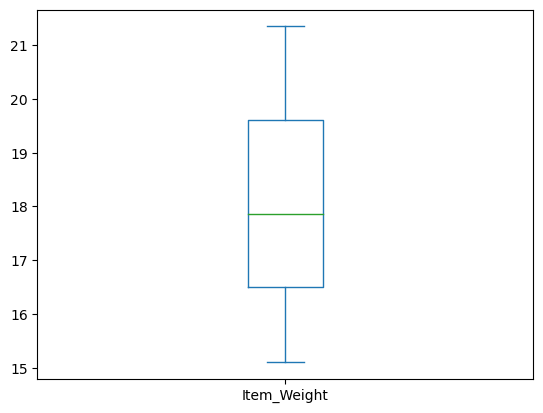

In [51]:
data['Item_Weight'].plot(kind='box')

In [53]:
#removing Item_Visibility outlier
data=data[data['Item_Visibility']>0.2]

<Axes: >

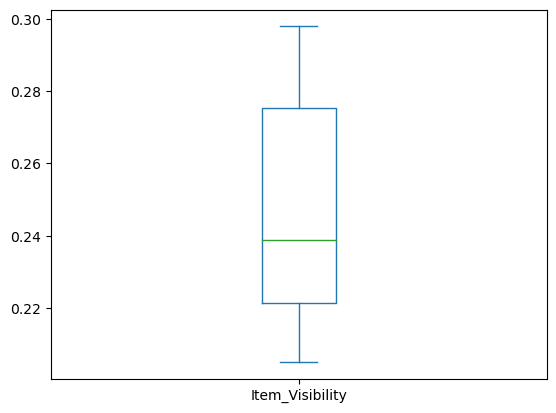

In [54]:
data['Item_Visibility'].plot(kind='box')

In [55]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

Item_Weight
Outliers =  4941    20.35
Name: Item_Weight, dtype: float64
Item_Visibility
Outliers =  Series([], Name: Item_Visibility, dtype: float64)
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)


In [56]:
data.isna().sum()

Item_Identifier               0
Item_Weight                   0
Item_Fat_Content              0
Item_Visibility               0
Item_Type                     0
Item_MRP                      0
Outlet_Identifier             0
Outlet_Establishment_Year     0
Outlet_Size                  19
Outlet_Location_Type          0
Outlet_Type                   0
Item_Outlet_Sales             0
dtype: int64

In [61]:
data['Outlet_Size'].unique()

array([nan], dtype=object)

In [62]:
data.shape

(19, 12)

In [71]:
data.drop(columns='Outlet_Size',inplace=True)

In [72]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Tier 3,Grocery Store,345.5502
521,FDC15,18.10,Low Fat,0.297884,Dairy,156.7288,OUT010,1998,Tier 3,Grocery Store,314.2576
680,FDG20,15.50,Regular,0.210376,Fruits and Vegetables,178.2028,OUT010,1998,Tier 3,Grocery Store,177.1028
1272,DRM23,16.60,Low Fat,0.227190,Hard Drinks,173.9422,OUT010,1998,Tier 3,Grocery Store,172.4422
1311,FDV28,16.10,Regular,0.267353,Frozen Foods,34.9558,OUT010,1998,Tier 3,Grocery Store,67.9116
1651,FDR43,18.20,Low Fat,0.270300,Fruits and Vegetables,38.3190,OUT010,1998,Tier 3,Grocery Store,109.8570
3399,FDC50,15.85,Low Fat,0.228470,Canned,93.3094,OUT010,1998,Tier 3,Grocery Store,285.6282
4350,FDN49,17.25,Regular,0.209600,Breakfast,40.3480,OUT010,1998,Tier 3,Grocery Store,39.9480
4530,FDZ16,16.85,Regular,0.267566,Frozen Foods,194.1478,OUT010,1998,Tier 3,Grocery Store,1162.4868
4656,FDR46,16.85,Low Fat,0.233357,Snack Foods,146.5760,OUT010,1998,Tier 3,Grocery Store,439.4280


In [73]:
data.shape

(19, 11)

In [74]:
data_cat=data.select_dtypes(exclude=np.number)

In [75]:
data_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
174,FDI32,Low Fat,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
521,FDC15,Low Fat,Dairy,OUT010,Tier 3,Grocery Store
680,FDG20,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
1272,DRM23,Low Fat,Hard Drinks,OUT010,Tier 3,Grocery Store
1311,FDV28,Regular,Frozen Foods,OUT010,Tier 3,Grocery Store
1651,FDR43,Low Fat,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
3399,FDC50,Low Fat,Canned,OUT010,Tier 3,Grocery Store
4350,FDN49,Regular,Breakfast,OUT010,Tier 3,Grocery Store
4530,FDZ16,Regular,Frozen Foods,OUT010,Tier 3,Grocery Store
4656,FDR46,Low Fat,Snack Foods,OUT010,Tier 3,Grocery Store


In [67]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [76]:
data['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)

In [77]:
data['Item_Fat_Content']

174     0
521     0
680     1
1272    0
1311    1
1651    0
3399    0
4350    1
4530    1
4656    0
4941    1
5031    0
5050    0
5374    1
5891    1
6536    1
6576    0
6833    0
6966    1
Name: Item_Fat_Content, dtype: int64

In [78]:
data['Item_Fat_Content'].reset_index()

,index,Item_Fat_Content
0,174,0
1,521,0
2,680,1
3,1272,0
4,1311,1
5,1651,0
6,3399,0
7,4350,1
8,4530,1
9,4656,0


In [79]:
data['Item_Fat_Content'].reset_index().drop(columns='index')

,Item_Fat_Content
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,1
9,0


In [80]:
data.reset_index().drop(columns='index')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDI32,17.70,0,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Tier 3,Grocery Store,345.5502
1,FDC15,18.10,0,0.297884,Dairy,156.7288,OUT010,1998,Tier 3,Grocery Store,314.2576
2,FDG20,15.50,1,0.210376,Fruits and Vegetables,178.2028,OUT010,1998,Tier 3,Grocery Store,177.1028
3,DRM23,16.60,0,0.227190,Hard Drinks,173.9422,OUT010,1998,Tier 3,Grocery Store,172.4422
4,FDV28,16.10,1,0.267353,Frozen Foods,34.9558,OUT010,1998,Tier 3,Grocery Store,67.9116
5,FDR43,18.20,0,0.270300,Fruits and Vegetables,38.3190,OUT010,1998,Tier 3,Grocery Store,109.8570
6,FDC50,15.85,0,0.228470,Canned,93.3094,OUT010,1998,Tier 3,Grocery Store,285.6282
7,FDN49,17.25,1,0.209600,Breakfast,40.3480,OUT010,1998,Tier 3,Grocery Store,39.9480
8,FDZ16,16.85,1,0.267566,Frozen Foods,194.1478,OUT010,1998,Tier 3,Grocery Store,1162.4868
9,FDR46,16.85,0,0.233357,Snack Foods,146.5760,OUT010,1998,Tier 3,Grocery Store,439.4280


In [81]:
data['Outlet_Location_Type'].unique()

array(['Tier 3'], dtype=object)

In [82]:
data['Outlet_Location_Type'].replace({'Tier 3':3},inplace=True)

In [83]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
174,FDI32,17.70,0,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,3,Grocery Store,345.5502
521,FDC15,18.10,0,0.297884,Dairy,156.7288,OUT010,1998,3,Grocery Store,314.2576
680,FDG20,15.50,1,0.210376,Fruits and Vegetables,178.2028,OUT010,1998,3,Grocery Store,177.1028
1272,DRM23,16.60,0,0.227190,Hard Drinks,173.9422,OUT010,1998,3,Grocery Store,172.4422
1311,FDV28,16.10,1,0.267353,Frozen Foods,34.9558,OUT010,1998,3,Grocery Store,67.9116
1651,FDR43,18.20,0,0.270300,Fruits and Vegetables,38.3190,OUT010,1998,3,Grocery Store,109.8570
3399,FDC50,15.85,0,0.228470,Canned,93.3094,OUT010,1998,3,Grocery Store,285.6282
4350,FDN49,17.25,1,0.209600,Breakfast,40.3480,OUT010,1998,3,Grocery Store,39.9480
4530,FDZ16,16.85,1,0.267566,Frozen Foods,194.1478,OUT010,1998,3,Grocery Store,1162.4868
4656,FDR46,16.85,0,0.233357,Snack Foods,146.5760,OUT010,1998,3,Grocery Store,439.4280


In [84]:
data['Outlet_Type'].unique()

array(['Grocery Store'], dtype=object)

In [85]:
data['Item_Type'].unique()

array(['Fruits and Vegetables', 'Dairy', 'Hard Drinks', 'Frozen Foods',
       'Canned', 'Breakfast', 'Snack Foods', 'Meat', 'Household',
       'Starchy Foods'], dtype=object)

In [86]:
data_item_cat = pd.get_dummies(data_cat['Item_Type'])

In [87]:
data_item_cat

,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Household,Meat,Snack Foods,Starchy Foods
174,0,0,0,0,1,0,0,0,0,0
521,0,0,1,0,0,0,0,0,0,0
680,0,0,0,0,1,0,0,0,0,0
1272,0,0,0,0,0,1,0,0,0,0
1311,0,0,0,1,0,0,0,0,0,0
1651,0,0,0,0,1,0,0,0,0,0
3399,0,1,0,0,0,0,0,0,0,0
4350,1,0,0,0,0,0,0,0,0,0
4530,0,0,0,1,0,0,0,0,0,0
4656,0,0,0,0,0,0,0,0,1,0


In [88]:
data_item_cat = data_item_cat.reset_index().drop(columns = 'index')

In [91]:
pd.concat([data_item_cat],axis=1)

,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Household,Meat,Snack Foods,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0
